# Clustering
Here we will clean the dataset of the News Channels that are not in english and generally not in the US

Then we try to find communities within our filtered dataset.

To detect the communites we use the Louvain Algorithm

In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd


## Load the graph generated previously

In [2]:
df_edges = pd.read_csv("csv_outputs/graph_channels.csv", sep=';')
display(df_edges.head())


,source,target,weight
0,1,2,1
1,1,3,3
2,1,4,2
3,1,12,1
4,1,13,2


In [3]:
# convert to networkx graph
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)

## Louvain algorithm on the unfiltered data

We chose the parameters for the algorithm so that it favors larger communities

In [4]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=0.5, threshold=1e-1,seed=1)

In [5]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 84 members
Community number 1 has 167 members
Community number 2 has 70 members
Community number 3 has 3 members
Community number 4 has 2 members
Community number 5 has 12 members
Community number 6 has 6 members
Community number 7 has 2 members
Community number 8 has 2 members
Community number 9 has 2 members
Community number 10 has 2 members
Community number 11 has 2 members
Community number 12 has 4 members
Community number 13 has 2 members


Now we print the contents of the 2 largest community numbers. We have not printed all of them here for brevity. Since we swapped the channel id strings for our channel id numbers, to find a channel id you need to : take the channel number go to the channels.csv file and find the corresponding channel id. Then type https://www.youtube.com/channel/"channel_id" to find the channel

The first community contains channel like IndiaTV or ABP News which are not in the scope of what we want to do.

In [6]:
print(louvain_partitions[0])

{1, 2, 3, 4, 1027, 263, 776, 12, 13, 1040, 529, 19, 20, 25, 28, 29, 30, 34, 546, 36, 292, 43, 44, 45, 303, 49, 51, 54, 60, 317, 316, 63, 65, 70, 329, 89, 94, 98, 99, 100, 359, 104, 105, 112, 368, 1392, 373, 634, 1408, 133, 645, 139, 146, 147, 402, 149, 150, 156, 159, 418, 420, 170, 171, 172, 174, 686, 178, 179, 1205, 190, 447, 451, 198, 454, 456, 461, 206, 464, 470, 216, 236, 1778, 1267, 251}


In this community we have what we are interested in. Channel number 6 is CNN and all the channels that we have checked ~60 out of 243 are all in english.

For the next part we will use these channels for our graph.

In [7]:
print(louvain_partitions[1])

filtered_channels = pd.DataFrame(louvain_partitions[1])

{512, 2049, 6, 7, 8, 9, 10, 2061, 1039, 2065, 21, 534, 537, 1562, 539, 31, 32, 2086, 56, 2106, 1084, 62, 64, 582, 583, 76, 77, 78, 2124, 82, 1109, 1110, 88, 93, 96, 97, 617, 1134, 626, 1141, 629, 120, 633, 1146, 122, 125, 126, 639, 1163, 140, 141, 651, 142, 1680, 145, 148, 661, 152, 1177, 153, 1185, 165, 680, 169, 2218, 1705, 173, 691, 692, 1203, 184, 187, 701, 1726, 191, 192, 195, 707, 199, 200, 201, 202, 207, 208, 209, 722, 2255, 212, 221, 1249, 741, 1767, 744, 246, 257, 770, 259, 265, 266, 267, 1806, 273, 1813, 278, 1826, 1833, 302, 307, 308, 824, 313, 314, 1349, 328, 331, 333, 1360, 336, 340, 859, 349, 1379, 360, 1390, 366, 878, 374, 378, 1920, 386, 904, 396, 397, 911, 403, 404, 919, 408, 413, 928, 1447, 939, 428, 945, 1977, 446, 959, 1475, 1477, 1481, 458, 970, 972, 463, 466, 468, 469, 473, 991, 995, 486, 492, 1005, 494, 499, 1524, 1533}


In [8]:
filtered_channels = filtered_channels[0].sort_values(ascending=True)


In [9]:
display(filtered_channels)

2        6
3        7
4        8
5        9
6       10
      ... 
17    2086
19    2106
28    2124
64    2218
86    2255
Name: 0, Length: 167, dtype: int64

In [10]:
filtered_channels.to_csv("csv_outputs/louvain_filtered_channels_large.csv", sep=';', index=False)

We filter our graph with the channels that interest us.

In [11]:
def filter_function(n):
    return n in louvain_partitions[1]

sub_G = nx.subgraph_view(G, filter_node=filter_function)

We run the louvain algorithm on our filtered channels and print how many communities we have detected

In [12]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=1.5,threshold=1e-1, seed=1)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 10 communities


In [13]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 32 members
Community number 1 has 21 members
Community number 2 has 20 members
Community number 3 has 17 members
Community number 4 has 19 members
Community number 5 has 11 members
Community number 6 has 11 members
Community number 7 has 7 members
Community number 8 has 17 members
Community number 9 has 12 members


## Analysis of the communities

We print the channels numbers for each community and list for each community the name of the most known or defining channels we have found.
Note that the order in which the communities appear is made randomly by the louvain algorithm. Changing the seed changes the order in which the communities appear, but not the result.

### Leaning right

We have found these channels : Philip de Franco, Drama Alert, IntMensOrg.

We found that these channels were not the most "serious" news channels even though some of them are really well known. With some research we have found that they where leaning right and that IntMensOrg is proabably mysogynistic channels.

In [14]:
pd.Series(list(louvain_communities[0])).head()

0     259
1       7
2    1481
3      10
4     266
dtype: int64

### Clearly left

We have found these channels : CNN, Vox, MSNBC, The Young Turks which we have found to be clearly polarised to the left. These were more "serious" news channels

In [15]:
pd.Series(list(louvain_communities[1])).head()

0    1475
1     201
2     267
3      77
4     397
dtype: int64

### Far Right

In this community we have found Inside Edition, Fox News, Daily Wire, Rebel News. We have found the channels to be far right. Note that Rebel News is a canadian channe but is far right. This shows that far right communities cross borders, but also that we might have to clean our dataset a bit more 

In [16]:
pd.Series(list(louvain_communities[2])).head()

0     64
1    257
2    770
3    446
4      6
dtype: int64

### A little bit of unwanted channels

In this community we have found : Pat Condell(a sort of conspirationist), Sky News Australia, National Post.These channels are to be removed. Most of them are not really known and are not in the US. They are canadian, australian..

In [17]:
pd.Series(list(louvain_communities[3])).head()

0    512
1    386
2    707
3    458
4      9
dtype: int64

### Business oriented ?

In this community we have found : Today, China uncensored, Fox Business. Further investigation is needed. Maybe when we use the whole dataset we will find more meaningful conclusions. This community might be business oriented du to its interest in China (China uncensored speaks about what is happening in China and Fox business talks about china)

In [18]:
pd.Series(list(louvain_communities[4])).head()

0     582
1     200
2     331
3     396
4    1039
dtype: int64

### Leaning Left

In this group we have found : Truly, ABC News, BBC News, True Crime Daily, Business Insider, New York Times. These channels are all really well known. On allsides they are classified as being either left, leaning left and center. More data might classify this better, if not we will have to investigate.

In [19]:
pd.Series(list(louvain_communities[5])).head()

0      32
1     192
2    1163
3     141
4     366
dtype: int64

### International Channels

In this community we have found : Al Jazeera (Quatari owned news channel), African Diaspora news, France 24 English, Visual Politik EN. All these channels are in english and might talk about what is happening in the US but might be outside of the scope of what we want to see

In [20]:
pd.Series(list(louvain_communities[6])).head()

0    1249
1    1349
2    1477
3     904
4     140
dtype: int64

In [21]:
df_tosave = nx.to_pandas_edgelist(sub_G,)
df_tosave.to_csv('data/louvain_filtered_graph.csv', sep=';', index=False)

In [22]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(gravity=0.0000, scalingRatio=1.5, edgeWeightInfluence=0.5, outboundAttractionDistribution=False)
posses = forceatlas2.forceatlas2_networkx_layout(sub_G,iterations=1000)

100%|██████████| 1000/1000 [00:01<00:00, 943.66it/s]

BarnesHut Approximation  took  0.35  seconds
Repulsion forces  took  0.47  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.11  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


In [25]:
import cmasher as cmr

cmap = cmr.get_sub_cmap('CMRmap', 0.15, 0.95, N=len(louvain_communities))

In [26]:
mapping = {}
for i, l in enumerate(louvain_communities):
    list_ = list(l)
    list_.sort()
    for elem in list_:
        mapping[elem] =i

for n in sub_G.nodes:
    sub_G.nodes[n]["louvain"] = mapping[n]

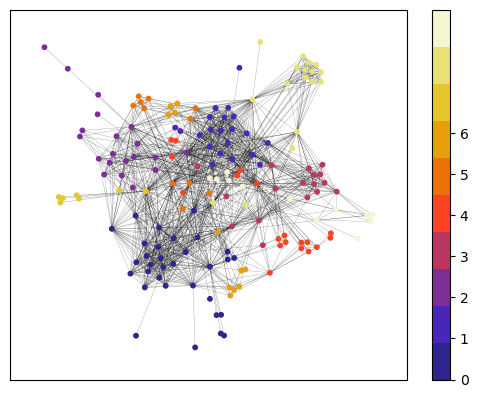

In [29]:
import matplotlib.pyplot as plt
nc = nx.draw_networkx_nodes(sub_G, pos=posses, node_size=10, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=cmap)
ec = nx.draw_networkx_edges(sub_G, pos=posses, width=0.1)
#nx.draw_networkx_labels(sub_G, pos=posses)
#nx.draw_networkx(sub_G, pos=posses, with_labels=False, width=0,node_size=0.5, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=plt.cm.bwr)

cb = plt.colorbar(nc, ticks=[0,1,2,3,4,5,6])